In [1]:
import numpy as np
import pandas as pd 
from importlib import reload
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx 
import json

import datetime

from src.Machine import Machine
from src.Job import Job
from src.Operation import Operation
from src.Agent import Agent
from src.Production_line import Production_line

In [2]:
prod_line = Production_line()
agent = Agent(prod_line)
job1 = Job("TEST1", 1,20000)
job2 = Job("TEST2", 1,20000)

prod_line.add_job(job1)
prod_line.add_job(job2)



True

In [3]:

for i in range(100):
    print("operations dispo :",agent.get_available_operation())
    print("decisions dispo : ",agent.get_available_actions())
    print("decision prise : ",agent.take_decision())
    
    state = prod_line.get_rl_formated_state()
    for s in state:
        print(s)
    print("=========================================")
    


operations dispo : [(1, 1), (2, 1)]
decisions dispo :  [(1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2), 'forward']
decision prise :  (1, 1, 1)
{'status': 1, 'processing_time': 2, 'nbr_of_sucessor': 13, 'expiration_time': 12, 'remaining_time': -1, 'executable': True}
{'status': 0, 'processing_time': 1, 'nbr_of_sucessor': 12, 'expiration_time': 60, 'remaining_time': -1, 'executable': False}
{'status': 0, 'processing_time': 1, 'nbr_of_sucessor': 11, 'expiration_time': 2, 'remaining_time': -1, 'executable': False}
{'status': 0, 'processing_time': 2, 'nbr_of_sucessor': 10, 'expiration_time': 60, 'remaining_time': -1, 'executable': False}
{'status': 0, 'processing_time': 4, 'nbr_of_sucessor': 9, 'expiration_time': 2, 'remaining_time': -1, 'executable': False}
{'status': 0, 'processing_time': 2, 'nbr_of_sucessor': 8, 'expiration_time': 60, 'remaining_time': -1, 'executable': False}
{'status': 0, 'processing_time': 3, 'nbr_of_sucessor': 7, 'expiration_time': 14, 'remaining_time': -1, 'executable':

{'status': 0, 'operation': (0, 0)}
{'status': 0, 'operation': (0, 0)}
{'status': 0, 'operation': (0, 0)}
operations dispo : [(2, 14)]
decisions dispo :  [(2, 14, 14), 'forward']
decision prise :  (2, 14, 14)
{'status': 2, 'processing_time': 0, 'nbr_of_sucessor': 13, 'expiration_time': 11, 'remaining_time': -1, 'executable': True}
{'status': 2, 'processing_time': 0, 'nbr_of_sucessor': 12, 'expiration_time': 57, 'remaining_time': -1, 'executable': True}
{'status': 2, 'processing_time': 0, 'nbr_of_sucessor': 11, 'expiration_time': 1, 'remaining_time': -1, 'executable': True}
{'status': 2, 'processing_time': 0, 'nbr_of_sucessor': 10, 'expiration_time': 58, 'remaining_time': -1, 'executable': True}
{'status': 2, 'processing_time': 0, 'nbr_of_sucessor': 9, 'expiration_time': 1, 'remaining_time': -1, 'executable': True}
{'status': 2, 'processing_time': 0, 'nbr_of_sucessor': 8, 'expiration_time': 59, 'remaining_time': -1, 'executable': True}
{'status': 2, 'processing_time': 0, 'nbr_of_sucessor

In [4]:
planning = prod_line.get_gant_formated()

plan_df = pd.DataFrame()
for plan in planning:
    print(plan,"\n")
    df = pd.DataFrame(plan, columns =['Job','Machine', 'Operation', 'Start','Duration','Finish'])
    plan_df = pd.concat([plan_df, df], axis=0)

plan_df.reset_index(drop = True,inplace=True)

plan_df['Machine']= plan_df['Machine'].astype(str)
plan_df['Duration']= plan_df['Duration'].astype(int)




    
print(plan_df.dtypes)
print(plan_df)



[('TEST1', 1, 1, 0.0, 2.0, 2.0), ('TEST1', 3, 2, 2.0, 1.0, 3.0), ('TEST1', 5, 3, 5.0, 1.0, 6.0), ('TEST1', 6, 4, 10.0, 2.0, 12.0), ('TEST1', 1, 5, 13.0, 4.0, 17.0), ('TEST1', 3, 6, 17.0, 2.0, 19.0), ('TEST1', 8, 7, 5.0, 3.0, 8.0), ('TEST1', 9, 9, 19.0, 4.0, 23.0), ('TEST1', 10, 10, 24.0, 1.0, 25.0), ('TEST1', 11, 11, 25.0, 2.0, 27.0), ('TEST1', 12, 12, 27.0, 4.0, 31.0), ('TEST1', 13, 13, 34.0, 1.0, 35.0), ('TEST1', 14, 14, 35.0, 1.0, 36.0), ('TEST1', 5, 3, 7.0, 1.0, 8.0), ('TEST1', 4, 3, 9.0, 1.0, 10.0)] 

[('TEST2', 2, 1, 1.0, 2.0, 3.0), ('TEST2', 3, 2, 3.0, 1.0, 4.0), ('TEST2', 4, 3, 5.0, 1.0, 6.0), ('TEST2', 6, 4, 6.0, 2.0, 8.0), ('TEST2', 2, 5, 10.0, 4.0, 14.0), ('TEST2', 3, 6, 14.0, 2.0, 16.0), ('TEST2', 8, 7, 1.0, 3.0, 4.0), ('TEST2', 9, 9, 23.0, 4.0, 27.0), ('TEST2', 10, 10, 27.0, 1.0, 28.0), ('TEST2', 11, 11, 33.0, 2.0, 35.0), ('TEST2', 12, 12, 35.0, 4.0, 39.0), ('TEST2', 13, 13, 39.0, 1.0, 40.0), ('TEST2', 14, 14, 41.0, 1.0, 42.0), ('TEST2', 8, 7, 17.0, 3.0, 20.0)] 

Job      

      Job Machine  Operation  Start  Duration  Finish
0   TEST1       1          1    0.0         2     2.0
1   TEST1       3          2    2.0         1     3.0
2   TEST1       5          3    5.0         1     6.0
3   TEST1       6          4   10.0         2    12.0
4   TEST1       1          5   13.0         4    17.0
5   TEST1       3          6   17.0         2    19.0
6   TEST1       8          7    5.0         3     8.0
7   TEST1       9          9   19.0         4    23.0
8   TEST1      10         10   24.0         1    25.0
9   TEST1      11         11   25.0         2    27.0
10  TEST1      12         12   27.0         4    31.0
11  TEST1      13         13   34.0         1    35.0
12  TEST1      14         14   35.0         1    36.0
13  TEST1       5          3    7.0         1     8.0
14  TEST1       4          3    9.0         1    10.0
15  TEST2       2          1    1.0         2     3.0
16  TEST2       3          2    3.0         1     4.0
17  TEST2       4          3

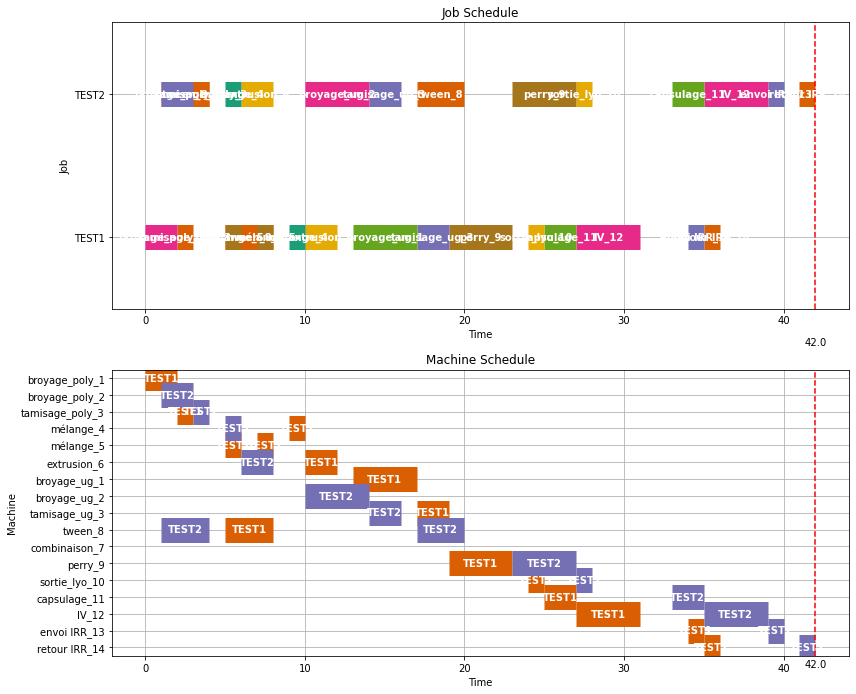

In [5]:
def visualize(results):
    
    operation_machine = {(1,1) : "broyage_poly_1",
                     (1,2) : "broyage_poly_2",
                     (2,3) : "tamisage_poly_3",
                     (3,4) : "mélange_4",
                     (3,5) : "mélange_5",
                     (4,6) : "extrusion_6",
                     (5,1) : "broyage_ug_1",
                     (5,2) : "broyage_ug_2",
                     (6,3) : "tamisage_ug_3",
                     (7,8) : "tween_8",
                     (8,7) : "combinaison_7",
                     (9,9) : "perry_9",
                     (10,10) : "sortie_lyo_10",
                     (11,11) : "capsulage_11",
                     (12,12) : "IV_12",
                     (13,13) : "envoi IRR_13",
                     (14,14) : "retour IRR_14"}
    
    schedule = results.copy()
    print(schedule)
    op_machine = []
    for row in schedule.iterrows():

        op = row[1]["Operation"]
        machine = row[1]["Machine"]
        op_machine.append(operation_machine[int(op),int(machine)])
    
    schedule["op_machine"] = op_machine
    
    JOBS = sorted(list(schedule['Job'].unique()))
    operation_machine_sorted = [value for key,value in operation_machine.items()][::-1]
    MACHINES = operation_machine_sorted
    makespan = schedule['Finish'].max()
    
    bar_style = {'alpha':1.0, 'lw':25, 'solid_capstyle':'butt'}
    text_style = {'color':'white', 'weight':'bold', 'ha':'center', 'va':'center'}
    colors = mpl.cm.Dark2.colors

    schedule.sort_values(by=['Job', 'Start'])
    schedule.set_index(['Job', 'op_machine'], inplace=True,append = True)
    
    fig, ax = plt.subplots(2,1, figsize=(12, 5+(len(JOBS)+len(MACHINES))/4))

    for jdx, j in enumerate(JOBS, 1):
        for mdx, m in enumerate(MACHINES, 1):
            for index,_,_ in schedule.index:
                if (index,j,m) in schedule.index:
                    print(index,j,m)

                    xs = schedule.loc[(index,j,m), 'Start']
                    xf = schedule.loc[(index,j,m), 'Finish']
                    ax[0].plot([xs, xf], [jdx]*2, c=colors[mdx%7], **bar_style)
                    ax[0].text((xs + xf)/2, jdx, m, **text_style)
                    ax[1].plot([xs, xf], [mdx]*2, c=colors[jdx%7], **bar_style)
                    ax[1].text((xs + xf)/2, mdx, j, **text_style)
                
    ax[0].set_title('Job Schedule')
    ax[0].set_ylabel('Job')
    ax[1].set_title('Machine Schedule')
    ax[1].set_ylabel('Machine')
    
    for idx, s in enumerate([JOBS, MACHINES]):
        ax[idx].set_ylim(0.5, len(s) + 0.5)
        ax[idx].set_yticks(range(1, 1 + len(s)))
        ax[idx].set_yticklabels(s)
        ax[idx].text(makespan, ax[idx].get_ylim()[0]-0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
        ax[idx].plot([makespan]*2, ax[idx].get_ylim(), 'r--')
        ax[idx].set_xlabel('Time')
        ax[idx].grid(True)
        
    fig.tight_layout()
    
visualize(plan_df)